In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytides.tide import Tide
from datetime import datetime

Here, the data from the Nain tide gauge is loaded:

In [2]:
Nain_gauge = pd.read_csv('h833a.csv', parse_dates=True)
Nain_gauge.head()

,year,month,day,hour,height
0,1963,10,17,5,530
1,1963,10,17,6,650
2,1963,10,17,7,970
3,1963,10,17,8,1380
4,1963,10,17,9,1870


Here, the missing values are replaced with NaN:

In [3]:
Nain_gauge = Nain_gauge.replace(-32767, np.NaN)

The mean observed water level is calculated. That value is then subtracted from each observation of water level in the dataset:

In [4]:
demeaned = Nain_gauge['height'] - Nain_gauge['height'].mean()
Nain_gauge['height_corr'] = demeaned

This is a list of index values that correspond to the beginning of a continuous year-long record of water level observations, and the row number of the measurement that occurs exactly one year later:

[1965: (16896, 25656),
 1967: (29856, 38616),
 1970: (60984, 69744),
 1971: (71352, 80112),
 2001: (332821, 341581),
 2010: (411838, 420598),
2014: (446492, 455252),
 2015: (455663, 464423),
 2016: (464424, 473184),
 2017 (473185, 481945)]

Here, the **tenth** pair of index values is used to slice the Nain gauge DataFrame into a one-year long record:

In [13]:
year17 = Nain_gauge.loc[473185:481944, :].reset_index(drop=True)

That data is visualized:

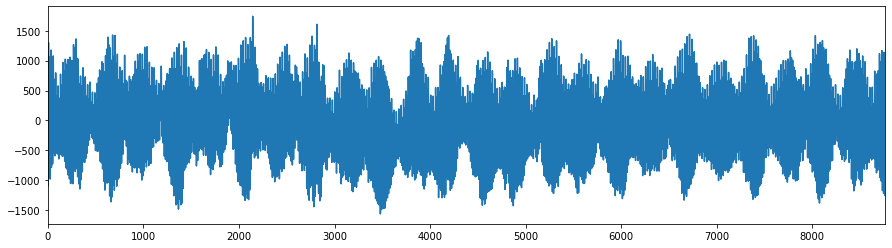

In [14]:
ax =  year17['height_corr'].plot(figsize=(15,4))

The first measurement in that record is defined as a datetime object called "t0":

In [15]:
t0 = datetime(year17.loc[0,'year'], year17.loc[0,'month'], year17.loc[0,'day'], year17.loc[0,'hour'])
t0

datetime.datetime(2017, 10, 9, 6, 0)

A one-year-long array of hours is generated:

In [16]:
hours = 0.1*np.arange(365 * 24)

An array of datetime objects, beginning at "t0" and of equal length to one-year's worth of hours, is generated:

In [17]:
times = Tide._times(t0, hours)
len(times)

8760

The tidal decomposition function from pytides is applied to the year of water level observations:

In [18]:
tide_17 = Tide.decompose(year17['height_corr'], times)

An array of water level over one year is generated for the data:

In [19]:
tide_model = tide_17.at(times)

The tidal model is plotted:

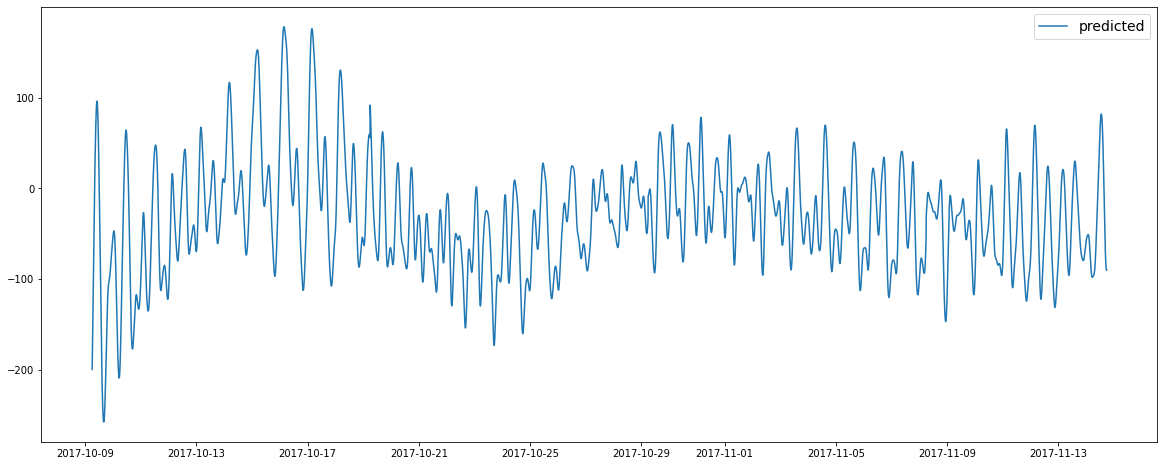

In [20]:
fig, ax = plt.subplots(figsize=(20,8))

# plot the model
ax.plot(times, tide_model, label='predicted')

ax.legend(fontsize=14)

plt.show()

The residuals are calculated:  

$R = height_{total} - height_{tides}$

In [22]:
residual = year17['height_corr'] - tide_model

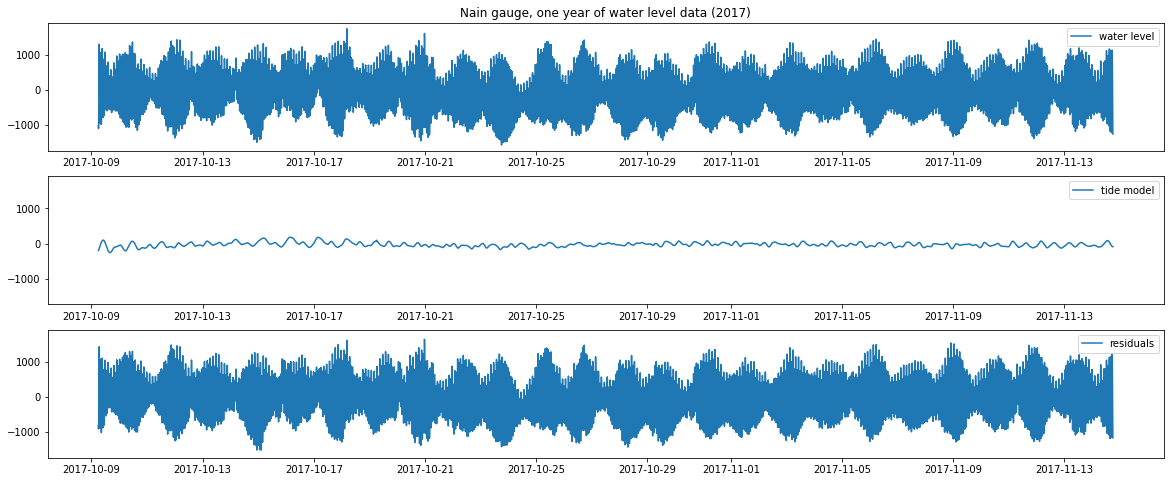

In [24]:
fig, ax = plt.subplots(3, 1, figsize=(20,8), sharey=True)

# gauge height timeseries
ax[0].plot(times, year17['height_corr'], label='water level')
ax[0].legend(loc='upper right')
ax[0].set_title('Nain gauge, one year of water level data (2017)')

# tidal timeseries 
ax[1].plot(times, tide_model, label='tide model')
ax[1].legend()

# residuals time series
ax[2].plot(times, residual, label='residuals')
ax[2].legend(loc='upper right')

plt.show()